In [20]:
cd ~/dv/sns-chops/resolution/ARCS/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop


In [1]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [4]:
from PyChop import PyChop2

In [5]:
instrument = PyChop2(
    '/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop/arcs-v2.yaml', 'ARCS-100-1.5-SMI', 600)

In [6]:
instrument.ei = 100

In [7]:
print "Flux = " + str(instrument.getFlux()[0]) + ' n/cm^2/s'
print
print "EN(meV)  FWHM(meV)"
en = np.arange(-50, 100, 10)
res = instrument.getResolution(en)
for (x,y) in zip(en, res):
    print "%0.2f     %0.3f" % (x, y)

Flux = 10943.442085 n/cm^2/s

EN(meV)  FWHM(meV)
-50.00     5.988
-40.00     5.583
-30.00     5.193
-20.00     4.818
-10.00     4.459
0.00     4.118
10.00     3.795
20.00     3.491
30.00     3.208
40.00     2.948
50.00     2.711
60.00     2.501
70.00     2.320
80.00     2.172
90.00     2.061


Exp data

In [8]:
exp_E, exp_FWHM = np.load('./C4H2I2S-exp.npy')

Plot

<IPython.core.display.Javascript object>


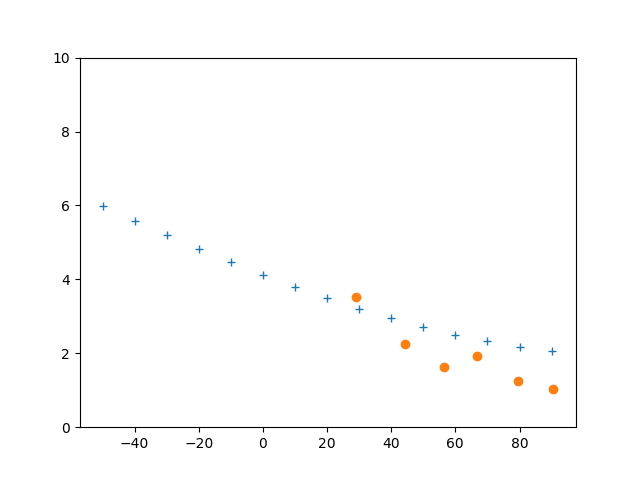

(0, 10)

In [9]:
plt.figure()
plt.plot(en, res, '+')
plt.plot(exp_E, exp_FWHM, 'o')
plt.ylim(0, 10)

# Compare to mcvine

In [12]:
import res_params_interped_funcs_Ei_100 as rpif

In [13]:
from dgsres import icg
geom = icg.Geom(l1=11.6, l2=2.0, l3=3.)

In [14]:
def res_func(Eaxis, E0, interped_funcs, Ei, geom):
    "return resolution function y array for the given x axis (Eaxis). E is the energy transfer"
    params = dict()
    for name in interped_funcs.keys():
        value = interped_funcs[name](E0)
        params[name] = value
    y = icg.resolution(Eaxis, Ei=100., E0=E0, geom=geom, **params)
    y/=y.sum()
    return y

In [15]:
Eaxis = np.arange(-30, 20, 0.01)

<IPython.core.display.Javascript object>


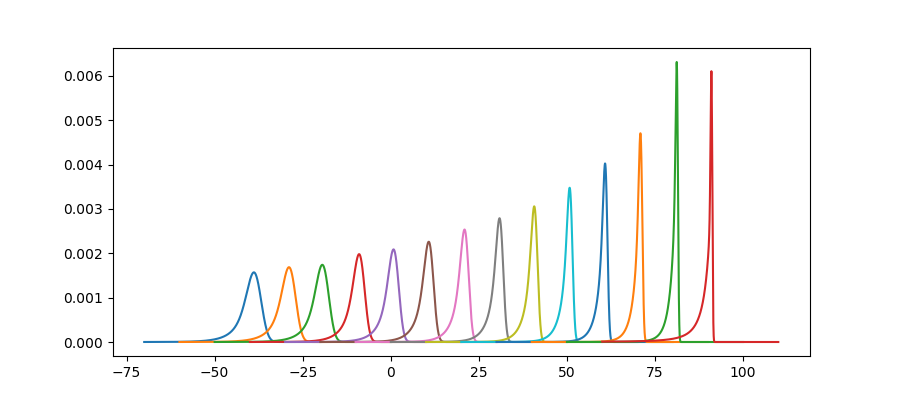

In [17]:
plt.figure(figsize=(9, 4))
for E0 in np.arange(-40., 95., 10.):
    x = Eaxis + E0
    y = res_func(x, E0, rpif.interped_funcs, Ei=100, geom=geom)
    plt.plot(x, y) #, '+-')
plt.show()

<IPython.core.display.Javascript object>


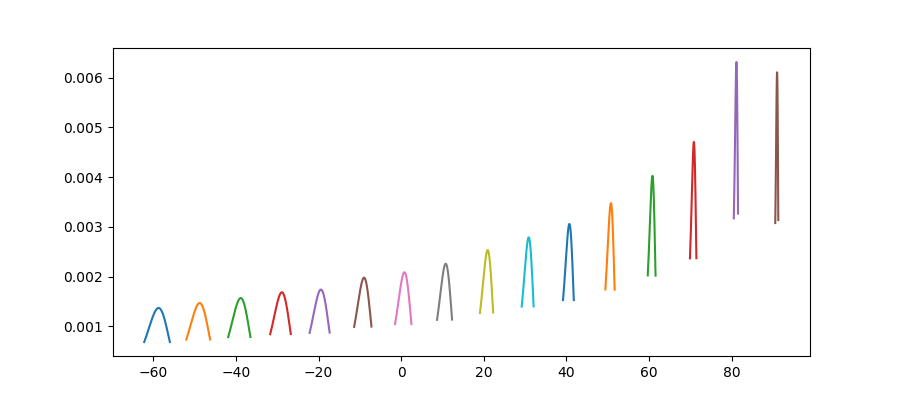

In [18]:
Etransfers = np.arange(-60., 95., 10.)
FWHMs = []
plt.figure(figsize=(9, 4))
for E0 in Etransfers:
    x = Eaxis + E0
    y = res_func(x, E0, rpif.interped_funcs, Ei=100, geom=geom)
    maxy = np.max(y)
    hm = maxy/2
    x1, y1 = x[y>hm], y[y>hm]
    plt.plot(x1, y1)
    FWHMs.append( x1[-1]-x1[0] )
plt.show()

<IPython.core.display.Javascript object>


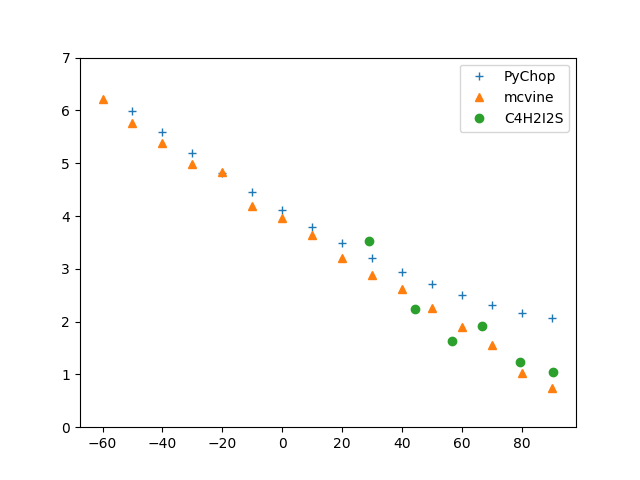

(0, 7)

In [19]:
plt.figure()
plt.plot(en, res, '+', label='PyChop')
plt.plot(Etransfers, FWHMs, '^', label='mcvine')
plt.plot(exp_E, exp_FWHM, 'o', label='C4H2I2S')
plt.legend()
plt.ylim(0, 7)

In [21]:
ls

arcs-v2.yaml
arcs-v3.yaml
arcs.yaml
C4H2I2S-2009data.ipynb
C4H2I2S-exp.ipynb
C4H2I2S-exp.npy
C4H2I2S-exp-try1.ipynb
cncs.yaml
Ei_100-Compare_PyChop_mcvine_C4H2I2S.ipynb
fit_and_interpolate-resolution-Ei_100.ipynb
mcvine-res-Ei_100/
mcvine-resolutions-Ei_100.ipynb
optimize pychop.ipynb
out/
README.md
res_params_interped_funcs_Ei_100.py
res_params_interped_funcs_Ei_100.pyc
res-sim/
sequoia-v2.yaml
sequoia.yaml
test-ARCS.ipynb
test-ARCS-v2.ipynb
test-ARCS-v3.ipynb
test-CNCS.ipynb


In [22]:
np.save('./mcvine-res-Ei_100.npy', (Etransfers, FWHMs))